A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the attached file. What does it contain, in both technical and functional terms? (Use any tool you want)

In this example, I am using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that the specific commands available under the ! sign are dependent on the OS.

### Check what the file contains

In [6]:
zip_path = 'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip'
! unzip -l {zip_path}

Archive:  On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
272856955  11-04-2019 17:15   On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv
    12152  11-04-2019 17:15   readme.html
---------                     -------
272869107                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell of your OS or the GUI.

Remember, since zip files contain several compressed files, we need to specify which one we want.

In [7]:
! unzip -o {zip_path}

Archive:  On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip
  inflating: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv  
  inflating: readme.html             


### Take a look at the beginning of the readme file

using the shell

The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [8]:
from IPython.display import IFrame

IFrame ('readme.html', 800, 300)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/3/library/zipfile.html)

First, open a connection to one of the files

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [10]:
pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.zip')

FileNotFoundError: [Errno 2] No such file or directory: 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.zip'

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [11]:
from zipfile import ZipFile

zf = ZipFile(zip_path)

zf

<zipfile.ZipFile filename='On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip' mode='r'>

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [12]:
zf.filelist[0]

<ZipInfo filename='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv' compress_type=deflate filemode='-rw-r--r--' file_size=272856955 compress_size=30506023>

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [13]:
csv = zf.open(zf.filelist[0])
csv.readline()

b'"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","Reporting_Airline","DOT_ID_Reporting_Airline","IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","Div

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [14]:
csv.readline()

b'2019,3,9,2,1,2019-09-02,"NK",20416,"NK","N631NK","1004",11697,1169706,32467,"FLL","Fort Lauderdale, FL","FL","12","Florida",33,14100,1410005,34100,"PHL","Philadelphia, PA","PA","42","Pennsylvania",23,"2055","",,,,,"2000-2059",,"","",,"2343","",,,,,"2300-2359",1.00,"B",0.00,168.00,,,1.00,992.00,4,,,,,,"",,,0,,,,,"",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","",\n'

In [17]:
df = pd.read_csv(csv)
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
csv.seek(0)

0

In [18]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
528182,2019,3,9,8,7,2019-09-08,DL,19790,DL,N952AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282651,2019,3,9,26,4,2019-09-26,AA,19805,AA,N109NN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299765,2019,3,9,1,7,2019-09-01,AA,19805,AA,N909AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363354,2019,3,9,19,4,2019-09-19,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269267,2019,3,9,16,1,2019-09-16,WN,19393,WN,N268WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.shape

(605979, 110)

In [20]:
pd.options.display.max_columns = None

In [21]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2343,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,B,0.0,168.0,NaN,NaN,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,2048.0,-7.0,0.0,0.0,-1.0,2000-2059,14.0,2102.0,2312.0,11.0,2343,2323.0,-20.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,168.0,155.0,130.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2054.0,9.0,9.0,0.0,0.0,2000-2059,12.0,2106.0,2338.0,13.0,2333,2351.0,18.0,18.0,1.0,1.0,2300-2359,0.0,NaN,0.0,168.0,177.0,152.0,1.0,992.0,4,9.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2044.0,-1.0,0.0,0.0,-1.0,2000-2059,15.0,2059.0,2317.0,13.0,2340,2330.0,-10.0,0.0,0.0,-1.0,2300-2359,0.0,NaN,0.0,175.0,166.0,138.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2040.0,-5.0,0.0,0.0,-1.0,2000-2059,10.0,2050.0,2259.0,11.0,2340,2310.0,-30.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,175.0,150.0,129.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Na

In [22]:
#Definir el número de NaNs de una tabla

df.isna().sum().sort_values(ascending=False)

Unnamed: 109                   605979
Div4WheelsOn                   605979
Div5TailNum                    605979
Div3Airport                    605979
Div3AirportID                  605979
Div3AirportSeqID               605979
Div3WheelsOn                   605979
Div3TotalGTime                 605979
Div3WheelsOff                  605979
Div3TailNum                    605979
Div4Airport                    605979
Div4AirportID                  605979
Div4AirportSeqID               605979
Div3LongestGTime               605979
Div4TotalGTime                 605979
Div4LongestGTime               605979
Div4WheelsOff                  605979
Div4TailNum                    605979
Div5Airport                    605979
Div5WheelsOff                  605979
Div5AirportID                  605979
Div5AirportSeqID               605979
Div5WheelsOn                   605979
Div5TotalGTime                 605979
Div5LongestGTime               605979
Div2WheelsOff                  605975
Div2TailNum 

In [24]:
#Determinar aquellas columnas con menos de 1000 datos

almost_empty_cols = df.columns[df.notna().sum() <= 1000]
almost_empty_cols

Index(['Div2Airport', 'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn',
       'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum',
       'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
       'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum',
       'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn',
       'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum',
       'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
       'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
       'Unnamed: 109'],
      dtype='object')

In [25]:
df2 = df.drop(almost_empty_cols, axis=1)
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2343,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,B,0.0,168.0,NaN,NaN,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,2048.0,-7.0,0.0,0.0,-1.0,2000-2059,14.0,2102.0,2312.0,11.0,2343,2323.0,-20.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,168.0,155.0,130.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2054.0,9.0,9.0,0.0,0.0,2000-2059,12.0,2106.0,2338.0,13.0,2333,2351.0,18.0,18.0,1.0,1.0,2300-2359,0.0,NaN,0.0,168.0,177.0,152.0,1.0,992.0,4,9.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2044.0,-1.0,0.0,0.0,-1.0,2000-2059,15.0,2059.0,2317.0,13.0,2340,2330.0,-10.0,0.0,0.0,-1.0,2300-2359,0.0,NaN,0.0,175.0,166.0,138.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2040.0,-5.0,0.0,0.0,-1.0,2000-2059,10.0,2050.0,2259.0,11.0,2340,2310.0,-30.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,175.0,150.0,129.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df2 = df.dropna(axis=1, thresh=1000)

In [27]:
df2.shape

(605979, 77)

In [28]:
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2343,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,B,0.0,168.0,NaN,NaN,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,2048.0,-7.0,0.0,0.0,-1.0,2000-2059,14.0,2102.0,2312.0,11.0,2343,2323.0,-20.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,168.0,155.0,130.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2054.0,9.0,9.0,0.0,0.0,2000-2059,12.0,2106.0,2338.0,13.0,2333,2351.0,18.0,18.0,1.0,1.0,2300-2359,0.0,NaN,0.0,168.0,177.0,152.0,1.0,992.0,4,9.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2044.0,-1.0,0.0,0.0,-1.0,2000-2059,15.0,2059.0,2317.0,13.0,2340,2330.0,-10.0,0.0,0.0,-1.0,2300-2359,0.0,NaN,0.0,175.0,166.0,138.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2040.0,-5.0,0.0,0.0,-1.0,2000-2059,10.0,2050.0,2259.0,11.0,2340,2310.0,-30.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,175.0,150.0,129.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [29]:
df2.columns.str.contains('Origin')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [30]:
df2[df2.columns[df2.columns.str.contains('Origin')]].sample(10)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
480189,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87
271379,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74
72495,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33
113453,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
54764,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36
115675,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
233195,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41
248330,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
128834,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91
315215,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22


In [31]:
df2.loc[34220]

Year                                                2019
Quarter                                                3
Month                                                  9
DayofMonth                                            12
DayOfWeek                                              4
FlightDate                                    2019-09-12
Reporting_Airline                                     YV
DOT_ID_Reporting_Airline                           20378
IATA_CODE_Reporting_Airline                           YV
Tail_Number                                       N243LR
Flight_Number_Reporting_Airline                     5939
OriginAirportID                                    11298
OriginAirportSeqID                               1129806
OriginCityMarketID                                 30194
Origin                                               DFW
OriginCityName                     Dallas/Fort Worth, TX
OriginState                                           TX
OriginStateFips                

In [32]:
NY_City = df[df['OriginCityName'].str.contains('New York, NY', na=False)]
NY_City.sample(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
152190,2019,3,9,12,4,2019-09-12,AS,19930,AS,N922VA,1059,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,930,929.0,-1.0,0.0,0.0,-1.0,0900-0959,25.0,954.0,1227.0,13.0,1245,1240.0,-5.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,375.0,371.0,333.0,1.0,2422.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282649,2019,3,9,24,2,2019-09-24,AA,19805,AA,N103NN,179,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,1100,1052.0,-8.0,0.0,0.0,-1.0,1100-1159,17.0,1109.0,1341.0,12.0,1419,1353.0,-26.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,379.0,361.0,332.0,1.0,2586.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481726,2019,3,9,25,3,2019-09-25,DL,19790,DL,N992AT,2884,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,700,656.0,-4.0,0.0,0.0,-1.0,0700-0759,14.0,710.0,745.0,8.0,817,753.0,-24.0,0.0,0.0,-2.0,0800-0859,0.0,NaN,0.0,77.0,57.0,35.0,1.0,184.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446482,2019,3,9,23,1,2019-09-23,B6,20409,B6,N520JB,135,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,1922,1918.0,-4.0,0.0,0.0,-1.0,1900-1959,22.0,1940.0,2155.0,6.0,2158,2201.0,3.0,3.0,0.0,0.0,2100-2159,0.0,NaN,0.0,336.0,343.0,315.0,1.0,2153.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362780,2019,3,9,16,1,2019-09-16,9E,20363,9E,N801AY,5154,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,14576,1457606,34576,ROC,"Rochester, NY",NY,36,New York,22,800,846.0,46.0,46.0,1.0,3.0,0800-0859,15.0,901.0,951.0,3.0,929,954.0,25.0,25.0,1.0,1.0,0900-0959,0.0,NaN,0.0,89.0,68.0,50.0,1.0,264.0,2,25.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

```python
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']
```

In [33]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

df3 = df2[interesting_columns]
df3.shape

(605979, 17)

In [34]:
df3['Flight_Number_Reporting_Airline'] = df3['Flight_Number_Reporting_Airline'].astype(str)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df3.dtypes

FlightDate                          object
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline     object
Origin                              object
OriginCityName                      object
OriginStateName                     object
OriginCityMarketID                   int64
Dest                                object
DestCityName                        object
DestStateName                       object
DestCityMarketID                     int64
DepTime                            float64
DepDelay                           float64
AirTime                            float64
Distance                           float64
dtype: object

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

Pandas interpreted the Deptime column as ints and the FlightDate column as strings. We might want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes. For that, we would need to use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).

Also, a pet peeve of mine: Flight numbers are names, not numbers!

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays: 5 maximum delays.

In [36]:
df3['DepDelay'].sort_values(ascending=False)[:5]

413463    1753.0
390701    1584.0
587829    1525.0
141845    1513.0
107081    1506.0
Name: DepDelay, dtype: float64

In [37]:
df3.sort_values(by='DepDelay', ascending=False).head(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
413463,2019-09-09,1,MQ,N697AB,3573,RST,"Rochester, MN",Minnesota,32547,ORD,"Chicago, IL",Illinois,30977,1942.0,1753.0,50.0,268.0
390701,2019-09-02,1,EV,N14573,4162,CVG,"Cincinnati, OH",Kentucky,33105,ORD,"Chicago, IL",Illinois,30977,2214.0,1584.0,49.0,264.0
587829,2019-09-16,1,UA,N19130,2032,MCO,"Orlando, FL",Florida,31454,EWR,"Newark, NJ",New Jersey,31703,830.0,1525.0,123.0,937.0
141845,2019-09-27,5,OO,N150SY,5441,MSP,"Minneapolis, MN",Minnesota,31650,ORD,"Chicago, IL",Illinois,30977,1215.0,1513.0,54.0,334.0
107081,2019-09-16,1,OO,N836SK,3633,ICT,"Wichita, KS",Kansas,30928,MSP,"Minneapolis, MN",Minnesota,31650,731.0,1506.0,77.0,545.0


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [38]:
df3.describe()

,DayOfWeek,OriginCityMarketID,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
count,605979.000000,605979.000000,605979.000000,596198.000000,596198.000000,594716.000000,605979.000000
mean,3.924228,31727.722362,31727.890871,1328.786985,6.421335,108.495852,787.482718
std,2.074963,1302.291509,1302.457897,497.344200,41.306174,68.889984,588.102800
min,1.000000,30070.000000,30070.000000,1.000000,-62.000000,6.000000,31.000000
25%,2.000000,30693.000000,30693.000000,916.000000,-6.000000,59.000000,361.000000
50%,4.000000,31453.000000,31453.000000,1322.000000,-3.000000,90.000000,622.000000
75%,6.000000,32467.000000,32467.000000,1738.000000,2.000000,136.000000,1013.000000
max,7.000000,35991.000000,35991.000000,2400.000000,1753.000000,665.000000,5095.000000


Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [39]:
df3.corr()

,DayOfWeek,OriginCityMarketID,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.003038,0.003036,0.003018,-0.005445,0.013200,0.013701
OriginCityMarketID,0.003038,1.000000,-0.052015,-0.052797,-0.010868,0.004599,0.006441
DestCityMarketID,0.003036,-0.052015,1.000000,0.062610,0.001942,0.007615,0.005803
DepTime,0.003018,-0.052797,0.062610,1.000000,0.117495,-0.023755,-0.018450
DepDelay,-0.005445,-0.010868,0.001942,0.117495,1.000000,0.026840,0.024777
AirTime,0.013200,0.004599,0.007615,-0.023755,0.026840,1.000000,0.989630
Distance,0.013701,0.006441,0.005803,-0.018450,0.024777,0.989630,1.000000


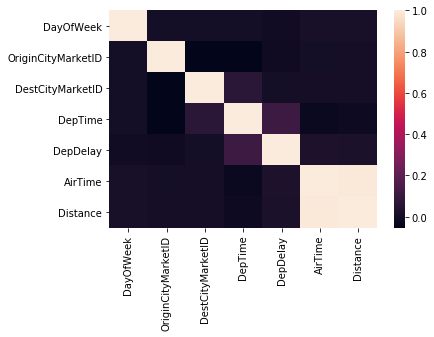

In [40]:
import seaborn as sns

sns.heatmap(df3.corr())

#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [41]:
df3['Tail_Number'].nunique()

5392

In [42]:
df3['Tail_Number'][:6]

0    N631NK
1    N620NK
2    N665NK
3    N672NK
4    N671NK
5    N675NK
Name: Tail_Number, dtype: object

In [43]:
tail_num = df3.groupby('Tail_Number')

len(tail_num)

5392

In [44]:
tail_num['DepDelay'].mean().sort_values(ascending=True)

Tail_Number
N73278    -15.416667
N36280    -13.250000
N37281    -10.666667
N79279     -9.416667
329NV      -9.272727
N659UA     -8.500000
N76062     -8.125000
304NV      -7.936170
N491HA     -7.714286
N29906     -7.625000
N668UA     -7.000000
312NV      -6.964286
306NV      -6.875000
N612AS     -6.800000
N3763D     -6.750000
N9681B     -6.625000
233NV      -6.623377
N184DN     -6.600000
N966TW     -6.333333
N69063     -6.250000
230NV      -6.076923
N613AS     -6.074830
333NV      -5.866667
N193SY     -5.736111
N34282     -5.714286
N77066     -5.666667
N548AS     -5.654762
271NV      -5.539683
N906DL     -5.500000
316NV      -5.463415
             ...    
N26902     69.153846
N343AN     74.692308
N397AN     74.760000
N820AL     75.500000
N222UA     76.500000
N78013     80.125000
N77019     81.800000
N827AN     83.857143
N799AN     89.000000
N652UA     93.000000
N78008     94.000000
N194DN    101.571429
N178DN    101.833333
N78017    106.142857
N339JB    110.500000
N812NW    119.000000
N

In [45]:
delays_per_plane = df3.groupby('Tail_Number')['DepDelay'].agg(['mean','count']).sort_values(by='mean', ascending= False)
consistently_delayed = delays_per_plane[delays_per_plane['count'] >= 15].sort_values(by='mean', ascending= False).head(5)

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [46]:
delays_per_plane

,mean,count
Tail_Number,,
N216UA,401.666667,3
N13954,276.000000,2
N799UA,239.333333,3
N648UA,236.666667,6
N225UA,207.000000,2
N830AN,192.666667,3
N798UA,174.000000,2
N808AN,153.714286,7
N27959,119.750000,4


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [47]:
consistently_delayed 

,mean,count
Tail_Number,,
N339JB,110.500000,18
N397AN,74.760000,25
N19130,62.183673,49
N777UA,54.645161,62
N771UA,52.438596,57


In [48]:
df3[[tail_number in consistently_delayed.index for tail_number in df3['Tail_Number']]]

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
281057,2019-09-21,6,AA,N397AN,54,MIA,"Miami, FL",Florida,32467,JFK,"New York, NY",New York,31703,856.0,21.0,145.0,1089.0
284270,2019-09-03,2,AA,N397AN,291,JFK,"New York, NY",New York,31703,MIA,"Miami, FL",Florida,32467,1256.0,-3.0,174.0,1089.0
284289,2019-09-22,7,AA,N397AN,291,JFK,"New York, NY",New York,31703,MIA,"Miami, FL",Florida,32467,1224.0,-5.0,132.0,1089.0
284300,2019-09-03,2,AA,N397AN,291,MIA,"Miami, FL",Florida,32467,JFK,"New York, NY",New York,31703,853.0,3.0,159.0,1089.0
292835,2019-09-13,5,AA,N397AN,1496,PHL,"Philadelphia, PA",Pennsylvania,34100,SJU,"San Juan, PR",Puerto Rico,34819,802.0,-8.0,201.0,1576.0
292845,2019-09-23,1,AA,N397AN,1496,PHL,"Philadelphia, PA",Pennsylvania,34100,SJU,"San Juan, PR",Puerto Rico,34819,804.0,-6.0,195.0,1576.0
292849,2019-09-27,5,AA,N397AN,1496,PHL,"Philadelphia, PA",Pennsylvania,34100,SJU,"San Juan, PR",Puerto Rico,34819,1250.0,280.0,202.0,1576.0
292864,2019-09-13,5,AA,N397AN,1496,SJU,"San Juan, PR",Puerto Rico,34819,PHL,"Philadelphia, PA",Pennsylvania,34100,1254.0,-8.0,211.0,1576.0
292874,2019-09-23,1,AA,N397AN,1496,SJU,"San Juan, PR",Puerto Rico,34819,PHL,"Philadelphia, PA",Pennsylvania,34100,1255.0,-7.0,215.0,1576.0
292878,2019-09-27,5,AA,N397AN,1496,SJU,"San Juan, PR",Puerto Rico,34819,PHL,"Philadelphia, PA",Pennsylvania,34100,831.0,1169.0,193.0,1576.0


#### Exercise: 

Show cities by descending number of airports

In [49]:
airport_by_cities = df3.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending= False)
airport_by_cities

OriginCityName
Mobile, AL                        2
Phoenix, AZ                       2
Houston, TX                       2
New York, NY                      2
Columbus, OH                      2
Chicago, IL                       2
Washington, DC                    2
Yuma, AZ                          1
Gillette, WY                      1
Fort Myers, FL                    1
Fort Smith, AR                    1
Fort Wayne, IN                    1
Fresno, CA                        1
Gainesville, FL                   1
Garden City, KS                   1
Grand Island, NE                  1
Grand Forks, ND                   1
Grand Junction, CO                1
Grand Rapids, MI                  1
Great Falls, MT                   1
Green Bay, WI                     1
Greensboro/High Point, NC         1
Greenville, NC                    1
Fort Lauderdale, FL               1
Flagstaff, AZ                     1
Flint, MI                         1
Guam, TT                          1
Dubuque, IA  

#### Exercise

The list above doesn't correspond to our intuitive expectation, probably. That is because airports serving the same general area may be located within several different city limits. This is encapsulated by the "market" concept in commercial aviation.

Find the 10 markets with the most airports, and which airports are included in them.

In [50]:
df3.groupby('OriginCityMarketID')['Origin'].nunique().sort_values(ascending= False)

OriginCityMarketID
31703    6
32575    5
30721    3
32457    3
30852    3
30647    2
32467    2
31453    2
30194    2
30466    2
33195    2
30977    2
31066    2
33667    2
30562    2
31471    1
31401    1
31468    1
31454    1
31481    1
31503    1
31504    1
31517    1
31447    1
31423    1
35991    1
31295    1
31337    1
31335    1
31076    1
        ..
33570    1
33360    1
33728    1
33785    1
33792    1
33795    1
33830    1
33832    1
33851    1
33367    1
33344    1
33105    1
33214    1
33121    1
33127    1
33139    1
33158    1
33184    1
33192    1
33198    1
33241    1
33342    1
33244    1
33256    1
33264    1
33277    1
33290    1
33304    1
33316    1
30070    1
Name: Origin, Length: 326, dtype: int64

In [51]:
cities_airports = df3.groupby(['OriginCityMarketID'])[['Origin','OriginCityName']].agg(['nunique','unique'])


cities_airports.sort_values(by=('OriginCityName','nunique'), ascending= False).head(10)

Origin                                 OriginCityName  \
                   nunique                          unique        nunique   
OriginCityMarketID                                                          
32575                    5       [LAX, BUR, ONT, LGB, SNA]              5   
31703                    6  [EWR, LGA, JFK, ISP, HPN, SWF]              5   
30721                    3                 [BOS, PVD, MHT]              3   
32457                    3                 [OAK, SFO, SJC]              3   
33195                    2                      [TPA, PIE]              2   
30647                    2                      [CLE, CAK]              2   
30852                    3                 [BWI, IAD, DCA]              2   
33667                    2                      [ORF, PHF]              2   
30194                    2                      [DFW, DAL]              2   
32467                    2                      [FLL, MIA]              2   

                                                                       
                                                               unique  
OriginCityMarketID                                                     
32575               [Los Angeles, CA, Burbank, CA, Ontario, CA, Lo...  
31703               [Newark, NJ, New York, NY, Islip, NY, White Pl...  
30721                    [Boston, MA, Providence, RI, Manchester, NH]  
32457                  [Oakland, CA, San Francisco, CA, San Jose, CA]  
33195                                 [Tampa, FL, St. Petersburg, FL]  
30647                                      [Cleveland, OH, Akron, OH]  
30852                                 [Baltimore, MD, Washington, DC]  
33667                    [Norfolk, VA, Newport News/Williamsburg, VA]  
30194                             [Dallas/Fort Worth, TX, Dallas, TX]  
32467                                [Fort Lauderdale, FL, Miami, FL]

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot of delays_by_plane with matplotlib, plotting mean delay versus number of departures. Check the documentation

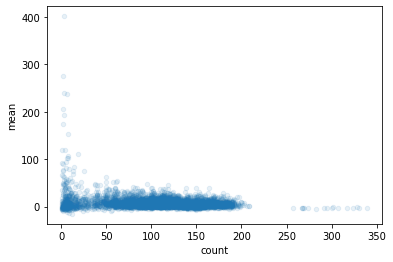

In [52]:
#alpha aplica opacidad a los punto y no oscurece almenos que haya al menos 10 punto en la misma intersección

delays_per_plane.plot.scatter(x='count',y='mean', alpha=.1);

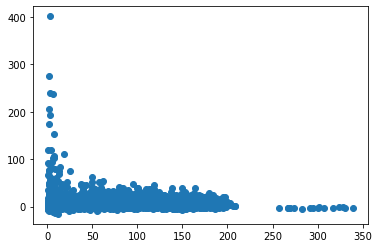

In [53]:
plt.scatter(delays_per_plane['count'],delays_per_plane['mean']);

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

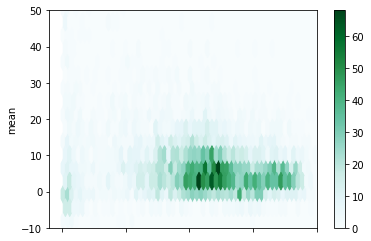

In [54]:
ax = delays_per_plane.plot.hexbin('count','mean');
ax.set_xlim(-10, 200);
ax.set_ylim(-10, 50);

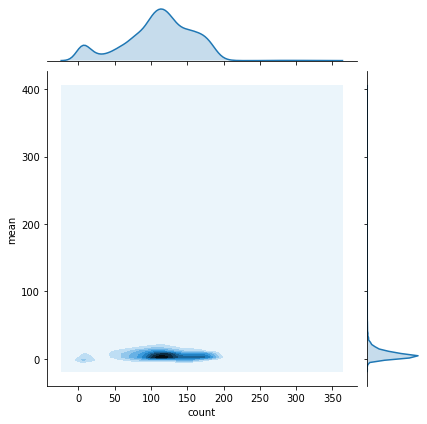

In [55]:
g = sns.jointplot(data=delays_per_plane, x='count', y='mean', kind='kde');
g

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

In [62]:
df3['DepDelay']

0           NaN
1          -7.0
2           9.0
3          -1.0
4          -5.0
5          -6.0
6          -5.0
7          -8.0
8          -8.0
9          -2.0
10         15.0
11        131.0
12         -4.0
13         -5.0
14          0.0
15         -3.0
16         -4.0
17         64.0
18         -5.0
19         -2.0
20         -4.0
21          4.0
22         98.0
23         -5.0
24         -7.0
25         47.0
26         -5.0
27         -9.0
28          0.0
29         -4.0
          ...  
605949     -8.0
605950     -6.0
605951     -8.0
605952    -14.0
605953     42.0
605954    -12.0
605955    -16.0
605956     -3.0
605957     -6.0
605958    -15.0
605959    -32.0
605960     -2.0
605961    134.0
605962     -6.0
605963     -1.0
605964     -9.0
605965    -11.0
605966    -18.0
605967     -3.0
605968    -11.0
605969    -17.0
605970     -7.0
605971    -22.0
605972    -10.0
605973     -7.0
605974    -12.0
605975     -2.0
605976    -10.0
605977     -7.0
605978     64.0
Name: DepDelay, Length: 

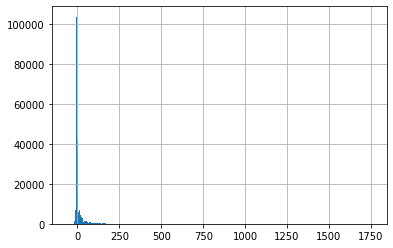

In [65]:
df3['DepDelay'].hist(bins=1000);

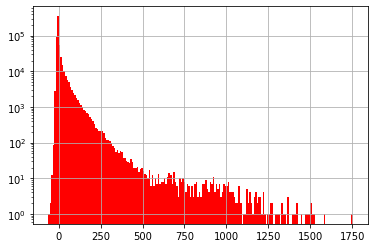

In [69]:
df3['DepDelay'].hist(bins=200, log=True, color='red');

#### Exercise:

How do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

In [106]:
df3['DepHour'].unique()

array(['000nan', '2048.0', '2054.0', ..., '0210.0', '0240.0', '0238.0'],
      dtype=object)

In [139]:
df3['DepHour'] = df3['DepTime'].astype(str).str.zfill(6).str[:2]
df3['DepHour']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0         00
1         20
2         20
3         20
4         20
5         20
6         20
7         20
8         17
9         17
10        21
11        22
12        20
13        20
14        20
15        17
16        17
17        21
18        20
19        20
20        20
21        20
22        19
23        17
24        20
25        21
26        20
27        20
28        20
29        06
          ..
605949    18
605950    18
605951    18
605952    18
605953    19
605954    18
605955    18
605956    18
605957    18
605958    18
605959    18
605960    18
605961    21
605962    18
605963    18
605964    18
605965    18
605966    18
605967    18
605968    18
605969    18
605970    18
605971    18
605972    18
605973    18
605974    18
605975    18
605976    18
605977    18
605978    20
Name: DepHour, Length: 605979, dtype: object

In [125]:
df3['DepHour'] = df3['DepTime'] // 100
df3['DepHour'].unique()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([nan, 20., 17., 21., 22., 19.,  6.,  8.,  7., 10., 11., 12., 13.,
       14., 15., 16., 18., 23.,  5.,  4.,  9.,  0.,  1.,  2.,  3., 24.])

AttributeError: module 'matplotlib.pyplot' has no attribute 'gfc'

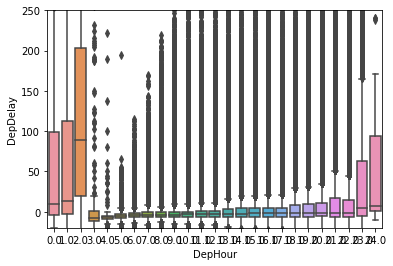

In [122]:
ax = sns.boxplot(data=df3, x='DepHour', y='DepDelay')
ax.set_ylim(-20,250)
plt.gfc().set_size_inches(14,8)

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

#### Exercise

We are also interested in examining how the home base influences delays. Do a boxplot of the delay distribution for the 10 airports with the most flights, and the 10 airports with the least flights.

In [142]:
flights_per_airport = df3.groupby('Origin')['Origin'].count()
pd.concat[(flights_per_airport.sort_values(ascending=False).head(10),
          flights_per_airport.sort_values.head(10))]

AttributeError: 'function' object has no attribute 'head'

#### Take home project

If we wanted to do some machine learning, we would need to create as many informative features as we thought could be useful. This is called Feature Engineering.

Discrete data would most often be transformed by [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), which is [very easy to do in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)

With high cardinality discrete data such as airports or, especially, tail numbers, we would be left with many variables, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding-done-the-right-way/).

This means that we substitute each value of the discrete variable by the average or median value of the target variable for that value of the independent discrete variable. However! if we want to use this in machine learning for predictions, we would need to use only the previous values.

Target encode the variable 'Origin' and the 'Tail_Number' variable, using for each cell only the values that were available the previous day. In other words: create a `median_delay_origin` variable that contains, for each record, the median delay at that airport _up to the previous day_. Create another one, `median_delay_plane`, with Tail_Number.